# euporie

Welcome to `euporie`, a terminal based interactive development environment for Jupyter notebooks.

- Use `Up` and `Down` to navigate, `Enter` to edit a cell, and `Esc` to stop editing a cell
- Use `Ctrl+e` to execute or render a cell, or `Ctrl+r` to run a cell and select the next cell
- You can view all keyboard shortcuts in the `Help` menu
- The online documentation is available at [https://euporie.readthedocs.io](https://euporie.readthedocs.io)
---

## Markdown Cells

`euporie` will render markdown cells in notebooks, including elements such as:

> Quote blocks

1. Ordered lists
    - Unordered lists
    - (Another list item)
2. **Bold**, *Italic*, ~~strikethrough~~, `code`

```python
def code_blocks():
    return True
```

| Tables       | *with* | ~~formatting~~ |
|-------------:|:------:|:---------------|
| **and**      | cell   | alignment      |

Inline maths: $x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}$ and maths blocks:

$$
f = \sum_{i = 0}^{\infty} \frac{f^{(i)}(0)}{i!} x^i
$$

Links: [https://euporie.readthedocs.io](https://euporie.readthedocs.io)

Inline images ![](https://user-images.githubusercontent.com/12154190/160242688-440c67ca-fdba-4ca4-a941-a35e200f9813.svg) in paragraphs.

---

## Cell Output

`Euporie` will also render the output of code cells.

This includes displaying Markdown, LaTeX, Images, HTML, SVG, JSON, and ANSI text:

In [1]:
display({"text/html": "<b>Bold</b> <u>Underlined</u> <i>Italic</i>"}, raw=True)

In [2]:
display({"text/latex": r"$x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}$"}, raw=True)

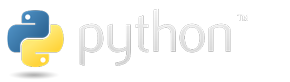

In [3]:
from IPython.display import *
import urllib.request
data = urllib.request.urlopen("https://www.python.org/static/img/python-logo.png").read()
Image(data)

This means you can use libraries like `pandas`, and display dataframes as you would expect:

In [4]:
import pandas as pd
import numpy as np

x = np.arange(20_000)

df = pd.DataFrame(
    {
        col: np.random.beta(i+1, 3, x.shape)
        for col, i in zip("abcd", [0, 2, 4, 6])
    },
    index = x,
)
df.head(15).style.background_gradient(cmap="viridis")

,a,b,c,d
0,0.581385,0.418329,0.530239,0.819402
1,0.274647,0.479165,0.706040,0.738399
2,0.202014,0.778438,0.655373,0.560403
3,0.516461,0.717488,0.562591,0.815000
4,0.114255,0.259444,0.653441,0.937493
5,0.499651,0.777001,0.505303,0.554056
6,0.004067,0.505651,0.543507,0.536516
7,0.252614,0.499193,0.624775,0.837803
8,0.076390,0.756249,0.883994,0.450247
9,0.079004,0.203078,0.650152,0.845574


`euporie` can render images using Sixel graphics if your terminal supports it. Otherwise it will fall back to using character-based terminal graphics.

This means you can produce plots with `matplotlib` and `euporie` will display them in the best way it can:

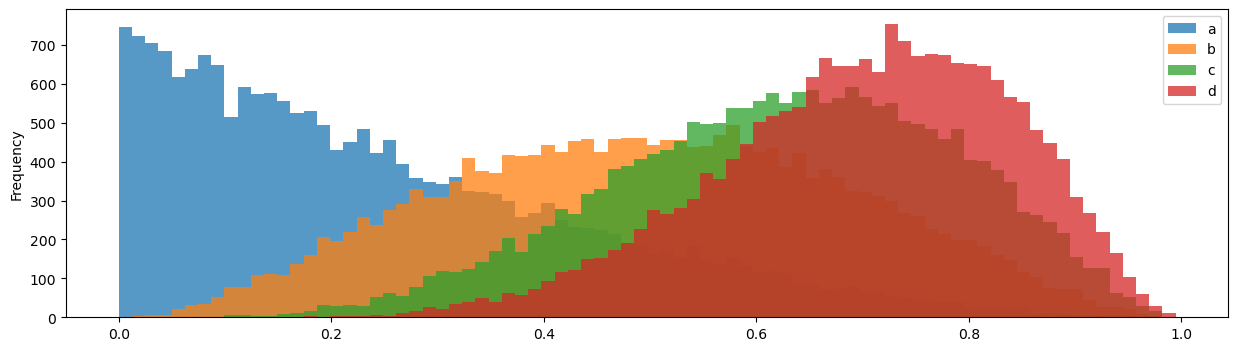

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 4), facecolor="#FFF")
df.plot.hist(ax=ax, bins=80, alpha=0.75)
plt.show()

If your terminal does not support graphics, the excellent `plotext` library works very well with euporie:

In [6]:
import plotext as plt

plt.clear_figure()
plt.plot_size(100, 15)
for name, col in df.items():
    plt.hist(col.values, 80, label=name)
plt.title("Histogram Plot")
plt.show()

                                   Histogram Plot                               
     ┌─────────────────────────────────────────────────────────────────────────┐
711.0┤████ a                                                                   │
     │████ b██                                             █                   │
592.5┤████ c██████                                 ███████████████             │
474.0┤████ d█████████ ██                     ████████████████████████          │
     │████████████████████    ████████████████████████████████████████         │
355.5┤██████████████████████████████████████████████████████████████████       │
     │███████████████████████████████████████████████████████████████████      │
237.0┤████████████████████████████████████████████████████████████████████     │
118.5┤██████████████████████████████████████████████████████████████████████   │
     │███████████████████████████████████████████████████████████████████████  │
  0.0┤█████ ████████████████

It can also display SVG output:

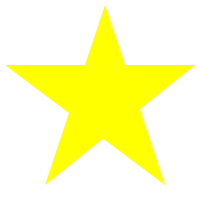

In [7]:
from IPython.display import SVG

SVG(
    '<svg width="200" height="200"><polygon points="105,5 45,185 195,65 5,65 165,185" fill="yellow" /></svg>'
)

Euporie can display JSON output interactively. Try clicking to expand and collapse items in the output:

In [8]:
from IPython.display import JSON

JSON(
    {
        "number": 123.456,
        "bool": True,
        "string": "This is a string",
        "list": ["First", "Second", "Third", "Fourth"],
        "dict": {
            "number": 123.456,
            "bool": True,
            "string": "This is a string",
            "list": ["First", "Second", "Third", "Fourth"],
        },
    },
    expanded=True,
    root="My JSON document",
)

<IPython.core.display.JSON object>

`euporie` supporst ANSI output, so  works with libraries like `tqdm` and `rich`:

In [9]:
import time
from tqdm import tqdm

for i in tqdm(range(20), ncols=100):
    time.sleep(0.2)

  0%|                                                                        | 0/20 [00:00<?, ?it/s]

  5%|███▏                                                            | 1/20 [00:00<00:03,  4.99it/s]

 10%|██████▍                                                         | 2/20 [00:00<00:03,  4.97it/s]

 15%|█████████▌                                                      | 3/20 [00:00<00:03,  4.97it/s]

 20%|████████████▊                                                   | 4/20 [00:00<00:03,  4.96it/s]

 25%|████████████████                                                | 5/20 [00:01<00:03,  4.96it/s]

 30%|███████████████████▏                                            | 6/20 [00:01<00:02,  4.96it/s]

 35%|██████████████████████▍                                         | 7/20 [00:01<00:02,  4.96it/s]

 40%|█████████████████████████▌                                      | 8/20 [00:01<00:02,  4.96it/s]

 45%|████████████████████████████▊                                   | 9/20 [00:01<00:02,  4.97it/s]

 50%|███████████████████████████████▌                               | 10/20 [00:02<00:02,  4.97it/s]

 55%|██████████████████████████████████▋                            | 11/20 [00:02<00:01,  4.97it/s]

 60%|█████████████████████████████████████▊                         | 12/20 [00:02<00:01,  4.97it/s]

 65%|████████████████████████████████████████▉                      | 13/20 [00:02<00:01,  4.97it/s]

 70%|████████████████████████████████████████████                   | 14/20 [00:02<00:01,  4.97it/s]

 75%|███████████████████████████████████████████████▎               | 15/20 [00:03<00:01,  4.97it/s]

 80%|██████████████████████████████████████████████████▍            | 16/20 [00:03<00:00,  4.97it/s]

 85%|█████████████████████████████████████████████████████▌         | 17/20 [00:03<00:00,  4.97it/s]

 90%|████████████████████████████████████████████████████████▋      | 18/20 [00:03<00:00,  4.97it/s]

 95%|███████████████████████████████████████████████████████████▊   | 19/20 [00:03<00:00,  4.97it/s]

100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.97it/s]

100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.97it/s]

In [10]:
from rich.progress import track

for _ in track(range(20)):
    time.sleep(0.2)

This means it can also display colored output from external commands:

In [11]:
!exa -l --icons --group-directories-first

drwxr-xr-x    - josiah 19 Aug 20:47  __pycache__
drwxr-xr-x    - josiah 28 Aug 14:37  dist
drwxr-xr-x    - josiah 18 Aug 14:48  docs
drwxr-xr-x    - josiah 18 Aug 14:48  euporie
drwxr-xr-x    - josiah  8 Aug 16:01  media
drwxr-xr-x    - josiah 28 Aug 14:35  scripts
drwxr-xr-x    - josiah 26 Aug 14:06  tests
.rw-r--r--  13k josiah 29 Aug 08:06  CHANGELOG.rst
.rw-r--r-- 1.1k josiah 18 Aug 14:48  LICENSE
.rw-r--r--  17M josiah 29 Aug 08:17  log.log
.rw-r--r-- 5.6k josiah 18 Aug 14:48  noxfile.py
.rw-r--r-- 6.6k josiah 27 Aug 11:05  output.log
.rw-r--r-- 179k josiah 28 Aug 17:37  poetry.lock
.rw-r--r-- 299k josiah 26 Aug 21:57  profile.log
.rw-r--r--  11k josiah 28 Aug 14:37  publish.log
.rw-r--r-- 4.1k josiah 28 Aug 17:34  pyproject.toml
.rw-r--r-- 4.4k josiah 28 Aug 14:35  README.rst
.rw-r--r--  11k josiah 29 Aug 08:05  ROADMAP.log


## Requesting input

`euoporie` can response to requests for user input from the kernel (press enter to send your input):

In [12]:
name = input("Enter your name:")
print(f"Hello {name}")

Hello Josiah


## `ipywidgets`

Euporie supports most of the widgets in `ipywidgets`, allowing you to build interactive applications inside your notebook in the terminal.

Run the following cell to try it out:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import widgets as w
from ipywidgets import interactive

def plot(n, color):
    x = np.arange(-20, 20, 0.1)
    y = np.sin(n*x) / x
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.plot(x, y, c=color, lw=5)
    plt.show()

n=w.IntSlider(description="n", value=2, min=-10, max=10)
color = w.ColorPicker(value="red", description="Colour")
output = w.interactive_output(plot, {'n':n, 'color': color})

w.VBox([n, color, output])

---

If you like `euporie`, please [star it on GitHub](https://github.com/joouha/euporie/)

⭐ https://github.com/joouha/euporie/